# Loan approval

Dataset: https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset

Tasks:
1. Exploration analysis
2. Data preprocessing
3. Machine learning model selection
4. Explanation of selected machine learning model
5. Selected model training on preprocessed dataset
6. Model evaluation
7. Conclusion

## 1. Exploration analysis
At first basic libraries such as pandas, numpy, seaborn and sklearn were imported.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
y_n_colors = {'N':'#C03028', 'Y':'#78C850'} # Red, Green

Then downloaded dataset was loaded. Afterwards, we found out shape of our data/matrix and some items from the top.

In [2]:
loan_approval_analysis = pd.read_csv("loan_approval_train.csv")

In [3]:
loan_approval_analysis.shape

(614, 13)

In [26]:
loan_approval_analysis.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Property_Area,Loan_Status,Gender_Coded,Married_Coded,Dependents_Coded,Edication_Coded,Self_Employed_Coded,Property_Area_Coded,Loan_Status_Coded,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,...,Urban,Y,1,0,0,0,0,2,1,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,...,Rural,N,1,1,1,0,0,0,0,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,...,Urban,Y,1,1,0,0,1,2,1,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,...,Urban,Y,1,1,0,1,0,2,1,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,...,Urban,Y,1,0,0,0,0,2,1,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,...,Urban,Y,1,1,2,0,1,2,1,9613.0
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,...,Urban,Y,1,1,0,1,0,2,1,3849.0
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,...,Semiurban,N,1,1,3,0,0,1,0,5540.0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,...,Urban,Y,1,1,2,0,0,2,1,5532.0
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,...,Semiurban,N,1,1,1,0,0,1,0,23809.0


We found out that there are some object attributes so we transformed them into category ones.
* Loan_ID - this attribute is string id of loan, which is not relevant for machine learning
* Gender - categorical attribute which has domain of Male, Female and Nan
* Married - categorical attribute which has domain of Yes, No and Nan
* Dependents - categorical attribute which has domain of 0, 1, 2, 3+ and Nan
* Education - categorical attribute which has domain of Graduate and Not Graduate
* Self_Employed - categorical attribute which has domain of Yes, No and Nan
* ApplicantIncome - income of loan applicant
* CoapplicantIncome - income of loan coapplicant
* LoanAmount - amount applicant/s want to loan
* LoanAmountTerm
* Credit_History - categorical attribute which has domain of 0.0, 1.0 and Nan
* Property_Area - categorical attribute which has domain of Urban, Semiurban and Rural
* Loan_Status - label whether the applicant/s received the loan

In [5]:
def objects_to_categories(df):
    for col in df:
        if (col != 'Loan_ID' and df[col].dtype == 'object'):
            df[col] = df[col].astype('category')

In [6]:
objects_to_categories(loan_approval_analysis)
loan_approval_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            614 non-null    object  
 1   Gender             601 non-null    category
 2   Married            611 non-null    category
 3   Dependents         599 non-null    category
 4   Education          614 non-null    category
 5   Self_Employed      582 non-null    category
 6   ApplicantIncome    614 non-null    int64   
 7   CoapplicantIncome  614 non-null    float64 
 8   LoanAmount         592 non-null    float64 
 9   Loan_Amount_Term   600 non-null    float64 
 10  Credit_History     564 non-null    float64 
 11  Property_Area      614 non-null    category
 12  Loan_Status        614 non-null    category
dtypes: category(7), float64(4), int64(1), object(1)
memory usage: 33.9+ KB


In [7]:
loan_approval_analysis.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

After attribute statistics we encoded our categorical values and then started performing some analysis using plots.

At first we used heat map which is good plot to start analysis, because correlation of all attributes can be easily seen. Practically, for us the only relevant row is Loan_Status_Coded because it shows correlation of all attributes with label attribute.

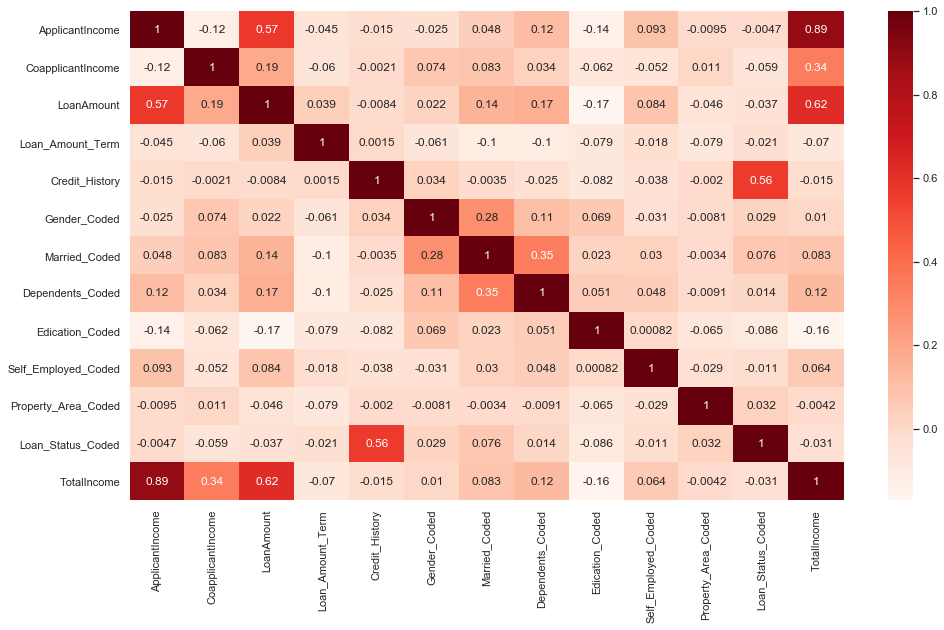

In [8]:
loan_approval_analysis['Gender_Coded'] = loan_approval_analysis.Gender.cat.codes
loan_approval_analysis['Married_Coded'] = loan_approval_analysis.Married.cat.codes
loan_approval_analysis['Dependents_Coded'] = loan_approval_analysis.Dependents.cat.codes
loan_approval_analysis['Edication_Coded'] = loan_approval_analysis.Education.cat.codes
loan_approval_analysis['Self_Employed_Coded'] = loan_approval_analysis.Self_Employed.cat.codes
loan_approval_analysis['Property_Area_Coded'] = loan_approval_analysis.Property_Area.cat.codes
loan_approval_analysis['Loan_Status_Coded'] = loan_approval_analysis.Loan_Status.cat.codes
loan_approval_analysis['TotalIncome'] = loan_approval_analysis['ApplicantIncome'] + loan_approval_analysis['CoapplicantIncome']

plt.figure(figsize=(16,9))
sns.heatmap(loan_approval_analysis.corr(method='pearson'), cmap='Reds', annot=True)

After heatmap plot we wanted to explore most interesting numerical attributes such as ApplicantIncome, CoapplicantIncome and LoanAmount. We wanted to see value ranges of these attributes. There are two columns because outliers were so high we could not see averages.

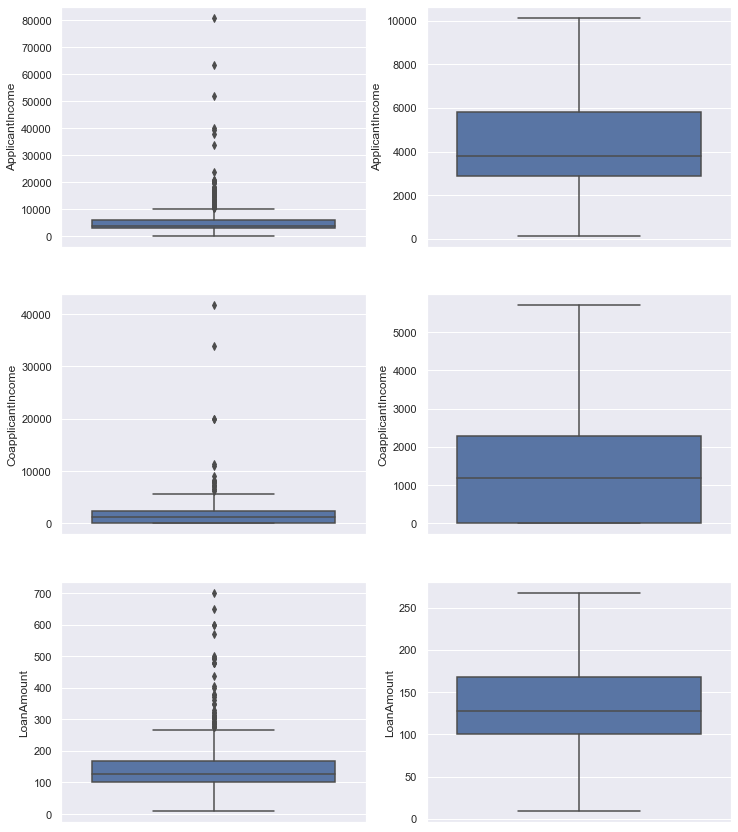

In [9]:
fig, ax = plt.subplots(3, 2, figsize=(12,15))
sns.boxplot(y='ApplicantIncome', data=loan_approval_analysis, showfliers=True, ax=ax[0,0])
sns.boxplot(y='ApplicantIncome', data=loan_approval_analysis, showfliers=False, ax=ax[0,1])
sns.boxplot(y='CoapplicantIncome', data=loan_approval_analysis, showfliers=True, ax=ax[1,0])
sns.boxplot(y='CoapplicantIncome', data=loan_approval_analysis, showfliers=False, ax=ax[1,1])
sns.boxplot(y='LoanAmount', data=loan_approval_analysis, showfliers=True, ax=ax[2,0])
sns.boxplot(y='LoanAmount', data=loan_approval_analysis, showfliers=False, ax=ax[2,1])

After exploring most interesting numerical values with box plots, we wanted to see them combined with some categorical values such as Education, Property_Area or Gender. We used strip plots for this purpose.

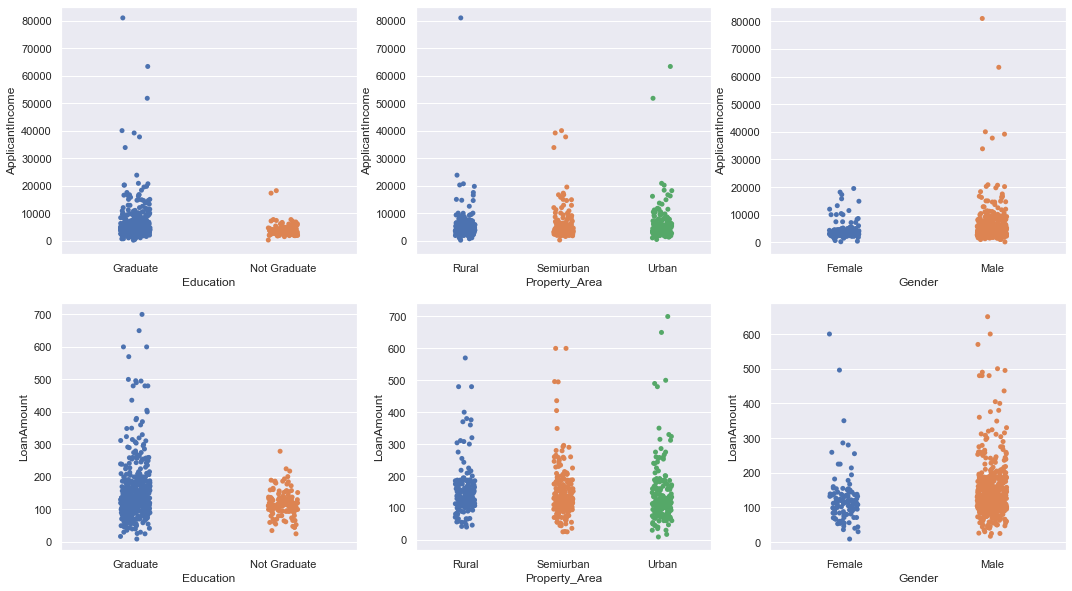

In [10]:
fig, ax = plt.subplots(2, 3, figsize=(18,10))
sns.stripplot(x='Education', y='ApplicantIncome', data=loan_approval_analysis, ax=ax[0,0])
sns.stripplot(x='Property_Area', y='ApplicantIncome', data=loan_approval_analysis, ax=ax[0,1])
sns.stripplot(x='Gender', y='ApplicantIncome', data=loan_approval_analysis, ax=ax[0,2])
sns.stripplot(x='Education', y='LoanAmount', data=loan_approval_analysis, ax=ax[1,0])
sns.stripplot(x='Property_Area', y='LoanAmount', data=loan_approval_analysis, ax=ax[1,1])
sns.stripplot(x='Gender', y='LoanAmount', data=loan_approval_analysis, ax=ax[1,2])

After strip plot analysis we finally came to analysis of label data depending on our categorical data. We wanted to see whether there is some interconnection between attributes such as Gender, Married, Dependents... and our label attribute.

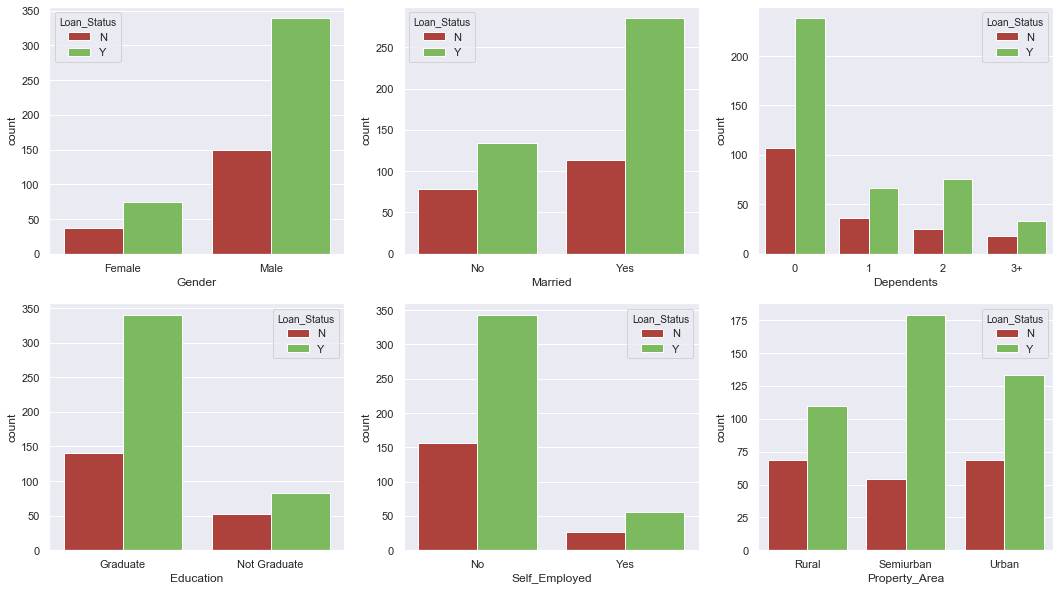

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(18,10))
sns.countplot(x='Gender', hue='Loan_Status', data=loan_approval_analysis, palette=y_n_colors, ax=ax[0,0])
sns.countplot(x='Married', hue='Loan_Status', data=loan_approval_analysis, palette=y_n_colors, ax=ax[0,1])
sns.countplot(x='Dependents', hue='Loan_Status', data=loan_approval_analysis, palette=y_n_colors, ax=ax[0,2])
sns.countplot(x='Education', hue='Loan_Status', data=loan_approval_analysis, palette=y_n_colors, ax=ax[1,0])
sns.countplot(x='Self_Employed', hue='Loan_Status', data=loan_approval_analysis, palette=y_n_colors, ax=ax[1,1])
sns.countplot(x='Property_Area', hue='Loan_Status', data=loan_approval_analysis, palette=y_n_colors, ax=ax[1,2])


Our last step of exploration analysis was to determing whether we can find any relation between LoanAmount, TotalIncome and our label attribute. As could be observed in out heatmap, there is meerly any correlation between LoanAmount, TotalIncome and whether those people got loan or not.

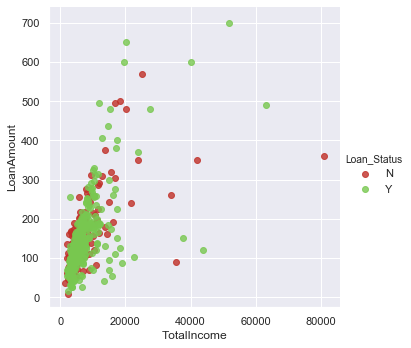

In [12]:
sns.lmplot(x = 'TotalIncome', y = 'LoanAmount', hue = 'Loan_Status', data = loan_approval_analysis, palette = y_n_colors, fit_reg = False)

## 2. Data preprocessing

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2

In [39]:
# Loaded data for training and testing
loan_approval_train = pd.read_csv("loan_approval_train.csv")
loan_approval_test = pd.read_csv("loan_approval_test.csv")

# Feature selection
# Dropping unnecessary column (ID), other columns are relevant
loan_approval_train = loan_approval_train.drop(columns=['Loan_ID'])
loan_approval_test = loan_approval_test.drop(columns=['Loan_ID'])

# Feature extraction
# Only new relevant feature is total income, in case person has coapplicant
loan_approval_train['TotalIncome'] = loan_approval_train['ApplicantIncome'] + loan_approval_analysis['CoapplicantIncome']

# Transforming object features to categories
objects_to_categories(loan_approval_train)
objects_to_categories(loan_approval_test)

In [34]:
# As we can see our data are a bit unbalanced
# But we can expect that the probability of aquiring loan is higher,
# therefore we know it is not serious problem
loan_approval_train['Loan_Status'].value_counts()


Y    422
N    192
Name: Loan_Status, dtype: int64

In [60]:
loan_approval_X, loan_approval_y = loan_approval_train.drop(columns=['Loan_Status']), loan_approval_train.Loan_Status
loan_approval_train_X, loan_approval_test_X, loan_approval_train_y, loan_approval_test_y = train_test_split(
    loan_approval_X, loan_approval_y, test_size=0.2, random_state=1
)

In [48]:
num_features = loan_approval_train_X.select_dtypes('number').columns
cat_features = loan_approval_train_X.select_dtypes('category').columns

# Possible KNNImputer
num_pipeline = make_pipeline(SimpleImputer(strategy='median', fill_value='missing'), RobustScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent', fill_value='missing'), OneHotEncoder(handle_unknown='ignore'))
default_preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_features), ('cat', cat_transformer, cat_features)])

## 3. Machine learning model selection

### KNN Classifier
### Logistic Regression
### Naive Bayes

## 4. Explanation of selected machine learning model

### KNN Classifier

### Logistic Regression

### Naive Bayes

## 5. Selected model training on preprocessed dataset


### KNN Classifier

### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression


In [ ]:
# Searching for best paremeters of Logistic regression/classificator



In [67]:
logistic_regression_pipeline = make_pipeline(
    default_preprocessor,
    LogisticRegression(max_iter = 1)
    )

logistic_regression_pipeline.fit(loan_approval_train_X, loan_approval_train_y)

c:\users\martin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  ColumnTransformer(n_jobs=None,
                                                                    remainder='drop',
                                                                    sparse_threshold=0.3,
                                                                    transformer_weights=None,
                                                                    transformers=[('pipeline',
                                                                                   Pipeline(memory=None,
                                                                                            steps=[('simpleimputer',
                               

### Naive Bayes

## 6. Model evaluation


### KNN Classifier

### Logistic Regression

### Naive Bayes

## 7. Conclusion